# 데이터 불러오기

## 브런치 데이터 불러오기

In [1]:
import pandas as pd
import pickle

with open("./data/result_2.pickle", 'rb') as f:
    result_2 = pickle.load(f)
df_2 = pd.DataFrame(result_2)

with open("./data/result_3_end.pickle", 'rb') as f:
    result_3 = pickle.load(f)
df_3 = pd.DataFrame(result_3)

df_4 = pd.read_csv("./data/result_4.csv")
df_6 = pd.read_csv("./data/result_6.csv")
df_9 = pd.read_csv("./data/result_9_previous.csv")
df_12 = pd.read_csv("./data/result_12.csv")
df_13 = pd.read_csv("./data/result_13.csv")

In [3]:
# 브런치 데이터 중복 제거 및 지문 중 누락값이 포함된 행 제거
def basic_preprocess(df):
    df.drop_duplicates('context', inplace=True)
    df.dropna(subset=['context'], inplace=True)
    return df

df_2 = basic_preprocess(df_2)
df_3 = basic_preprocess(df_3)
df_4 = basic_preprocess(df_4)
df_6 = basic_preprocess(df_6)
df_9 = basic_preprocess(df_9)
df_12 = basic_preprocess(df_12)
df_13 = basic_preprocess(df_13)

In [4]:
'''
{"일상":1, "에세이":2, "감성에세이":3, "일상에세이":4, "감성":5, "수필":6,
 "감성글":7, "사진에세이":8, "산문":9, "포토에세이":10, "감성일기":11, "산문집":12, "힐링에세이":13}
'''

# 스크래핑한 데이터 항목 확인 및 불러온 브런치 데이터 병합
df_all = pd.concat([df_2, df_3, df_4, df_6, df_9, df_12, df_13])

In [5]:
# 병합된 데이터 확인
df_all

,title,context
0,#1 괴물 신인이라 부르기로 하였어요.,그러니까 때는 바야흐로 9월 말.\n\n\n 할 일 없이 인스타를 눈팅하고 있었던...
1,NaN,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,NaN,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요?\n\nA: 저는 요...
3,사람이 100명이면 여행도 100가지,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. \n\n길가...
4,"클라이밍, 도파민","1.\n\n운동을 좋아하지 않는다……. \n아니다, 운동도 안 좋아하지만 운동을 포..."
...,...,...
23403,[레슨 3] 백핸드 스트로크를 배우다,"“보경 씨, 테니스를 치면 포핸드가 80, 백핸드가 20이야. 그만큼 많이 안 쓴다..."
23404,매일매일 먹고 살기. 7월 넷째 주,재택근무가 많은 주여서 아침도 챙겨 먹고 간식 비중도 어마어마했다. \n\n1. 월...
23405,코로나와 립스틱,"길기도 긴 코로나 시대에 우린\n""언젠간 끝나겠지""란 막연한 생각으로 하루하루를 보..."
23406,의연한 마음을 갖고 싶다.,의연한 마음을 갖고 싶다.\n\n'의연하다'의 사전적 정의는 한자어에 따라 다르다....


In [44]:
# 대회 주제인 '함께'라는 단어를 포함한 데이터 확인
df_all[df_all['context'].str.contains('함께')]

,title,context
0,#1 괴물 신인이라 부르기로 하였어요.,그러니까 때는 바야흐로 9월 말.\n\n\n 할 일 없이 인스타를 눈팅하고 있었던...
1,NaN,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
5,자유와 상생의 세상을 꿈꾸며,"‘글이 작품이 되는 공간, 브런치’에 신참 작가로 발을 들였다. 오프라인 세상..."
6,네가 흡연자라도 상관없어.,단언컨대 겨울은 완벽한 흡연의 계절이다. 내 입에서 뿜어져 나오는 것이 입김일까 ...
9,돈까스의 계절,"며칠 전, 첫눈이 내렸다.\n원래 가을이 이다지도 짧았었나? \n정말이지 '봄, 여..."
...,...,...
23388,[휘케치북] 21.08.03,‘Stuck On You - Meiko’\n\n기분이 좋아지는 곡입니다.\n늘 그렇...
23390,원고료 수백만 원을 괜히 준다는 게 아니었어,원고료 수백만 원을 괜히 준다는 게 아니었어\n\n\n\n\n\n\n\n\n\n과거...
23394,공간에 음악은 왜 중요할까.,"모든 소리는 우리의 이성과 감성적인 판단에 영향을 미친다. 나무 두드리는 소리, 세..."
23401,[에세이] 항구의 온도,그와 나는 소렌토의 해변을 말없이 걸었다. 우리의 목적지는 작별이었다. \...


## 글틴, 신춘문예, 정제된 브런치 데이터 불러오기

정제된 브런치 데이터는 브런치 사이트 내 브런치 북 탭에서 우수 작가의 글을 확인하고 작가 별 작품을 직접 수작업해 추출

In [6]:
data_train = pd.read_table("./data/small_dataset_train.txt", header=None, names=['text'])
data_eval = pd.read_table("./data/small_dataset_valid.txt", header=None, names=['text'])

In [7]:
dataset = pd.concat([data_train, data_eval])

In [8]:
dataset

,text
0,"스물네 번째 마음, 환하다 금요일에는 문학 치료에 관한 인터뷰이로 모교를 방문했다...."
1,별생각 없는 헤헤 실실 대학생으로 살다가 정신을 차려 보니 4학년이 코 앞이었다. ...
2,"부족한 살림 어떻게든 펴보겠다고, 아버지와 어머니는 부리나케 돈벌이를 하러 다녔다...."
3,망했다. UCC도 제출해야 해. 나는 한숨을 푹 쉬며 말했다. 반면 함께 공고 글을...
4,통유리창을 사이에 두고 모르는 여자가 전화기를 붙들고 울고 있었다. 여자의 젖은 눈...
...,...
25,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
26,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
27,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
28,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


# 간단한 데이터 확인

In [9]:
df_brunch = df_all.copy()
df_annualspring = dataset.copy()

In [12]:
'''
{"일상":1, "에세이":2, "감성에세이":3, "일상에세이":4, "감성":5, "수필":6,
 "감성글":7, "사진에세이":8, "산문":9, "포토에세이":10, "감성일기":11, "산문집":12, "힐링에세이":13}
'''

# 위 항목 별 스크래핑한 데이터 중 중복된 경우가 존재하여 다시 한번 중복 제거
df_brunch.drop_duplicates('context', inplace=True)
df_brunch

,title,context
0,#1 괴물 신인이라 부르기로 하였어요.,그러니까 때는 바야흐로 9월 말.\n\n\n 할 일 없이 인스타를 눈팅하고 있었던...
1,NaN,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,NaN,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요?\n\nA: 저는 요...
3,사람이 100명이면 여행도 100가지,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. \n\n길가...
4,"클라이밍, 도파민","1.\n\n운동을 좋아하지 않는다……. \n아니다, 운동도 안 좋아하지만 운동을 포..."
...,...,...
23401,[에세이] 항구의 온도,그와 나는 소렌토의 해변을 말없이 걸었다. 우리의 목적지는 작별이었다. \...
23404,매일매일 먹고 살기. 7월 넷째 주,재택근무가 많은 주여서 아침도 챙겨 먹고 간식 비중도 어마어마했다. \n\n1. 월...
23405,코로나와 립스틱,"길기도 긴 코로나 시대에 우린\n""언젠간 끝나겠지""란 막연한 생각으로 하루하루를 보..."
23406,의연한 마음을 갖고 싶다.,의연한 마음을 갖고 싶다.\n\n'의연하다'의 사전적 정의는 한자어에 따라 다르다....


In [13]:
df_annualspring

,text,context
0,"스물네 번째 마음, 환하다 금요일에는 문학 치료에 관한 인터뷰이로 모교를 방문했다....","스물네 번째 마음, 환하다 금요일에는 문학 치료에 관한 인터뷰이로 모교를 방문했다...."
1,별생각 없는 헤헤 실실 대학생으로 살다가 정신을 차려 보니 4학년이 코 앞이었다. ...,별생각 없는 헤헤 실실 대학생으로 살다가 정신을 차려 보니 4학년이 코 앞이었다. ...
2,"부족한 살림 어떻게든 펴보겠다고, 아버지와 어머니는 부리나케 돈벌이를 하러 다녔다....","부족한 살림 어떻게든 펴보겠다고, 아버지와 어머니는 부리나케 돈벌이를 하러 다녔다...."
3,망했다. UCC도 제출해야 해. 나는 한숨을 푹 쉬며 말했다. 반면 함께 공고 글을...,망했다. UCC도 제출해야 해. 나는 한숨을 푹 쉬며 말했다. 반면 함께 공고 글을...
4,통유리창을 사이에 두고 모르는 여자가 전화기를 붙들고 울고 있었다. 여자의 젖은 눈...,통유리창을 사이에 두고 모르는 여자가 전화기를 붙들고 울고 있었다. 여자의 젖은 눈...
...,...,...
25,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
26,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑...","선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
27,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못...","과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
28,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


In [14]:
# 브런치 데이터와 글틴, 신춘문예, 정제된 브런치 데이터 병합
df_annualspring['context'] = df_annualspring['text']
df_all = pd.concat([df_brunch.drop('title', axis=1), df_annualspring.drop('text', axis=1)])

df_all

,context
0,그러니까 때는 바야흐로 9월 말.\n\n\n 할 일 없이 인스타를 눈팅하고 있었던...
1,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요?\n\nA: 저는 요...
3,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. \n\n길가...
4,"1.\n\n운동을 좋아하지 않는다……. \n아니다, 운동도 안 좋아하지만 운동을 포..."
...,...
25,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
26,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
27,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
28,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


Text(0.5, 1.0, 'brunch')

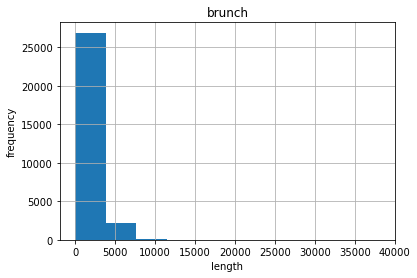

In [15]:
import matplotlib.pyplot as plt

# 제목의 글자 수 히스토그램 (브런치 데이터)
ax = df_brunch['context'].str.len().hist()

ax.set_xlabel('length')
ax.set_ylabel('frequency')
ax.set_title('brunch')

Text(0.5, 1.0, 'annual spring')

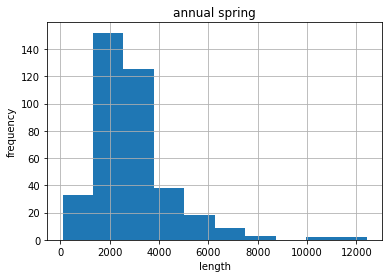

In [16]:
# 제목의 글자 수 히스토그램 (글틴, 신춘문예, 정제된 브런치 데이터)
ax = df_annualspring['context'].str.len().hist()

ax.set_xlabel('length')
ax.set_ylabel('frequency')
ax.set_title('annual spring')

<AxesSubplot:>

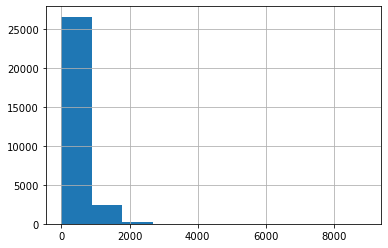

In [17]:
# 브런치 단어 개수 (y: 빈도수, x: 단어 개수)
df_brunch['context'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

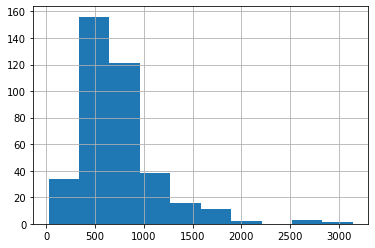

In [18]:
# 글틴, 신춘문예, 정제된 브런치 단어 개수 (y: 빈도수, x: 단어 개수)
df_annualspring['context'].str.split().map(lambda x: len(x)).hist()

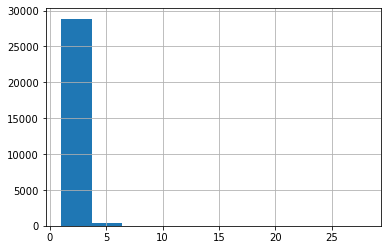

In [20]:
import numpy as np

# 브런치 평균 단어 길이
ax = df_brunch['context'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

<AxesSubplot:>

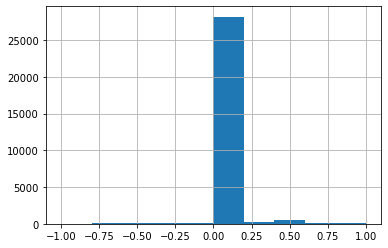

In [22]:
# textblob을 확인한 간단한 감성 분석
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

df_all['polarity_score']=df_all['context'].apply(lambda x : polarity(x))
df_all['polarity_score'].hist()

In [23]:
df_all.drop('polarity_score', axis=1, inplace=True)

In [24]:
df_all

,context
0,그러니까 때는 바야흐로 9월 말.\n\n\n 할 일 없이 인스타를 눈팅하고 있었던...
1,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요?\n\nA: 저는 요...
3,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. \n\n길가...
4,"1.\n\n운동을 좋아하지 않는다……. \n아니다, 운동도 안 좋아하지만 운동을 포..."
...,...
25,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
26,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
27,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
28,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


# 전처리

In [26]:
# !pip install soynlp -q

In [27]:
import re
from soynlp.normalizer import *

def preprocessing(text):
    # 문제를 일으킬 수 있는 문자 제거
    bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
    for bad_char in bad_chars:
        text = text.replace(bad_char, bad_chars[bad_char])
        
    error_chars = {"\u3000": " ", "\u2009": " ", "\u2002": " ", "\xa0":" "}
    for error_char in error_chars:
        text = text.replace(error_char, error_chars[error_char])
    
    # 이메일 제거
    text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "[이메일]", text).strip()
    
    # "#문자" 형식 어절 제거
    text = re.sub(r"#\S+", "", text).strip()
    
    # "@문자" 형식 어절 제거
    text = re.sub(r"@\w+", "", text).strip()
    
    # URL 제거
    text = re.sub(r"(http|https)?:\/\/\S+\b|www\.(\w+\.)+\S*", "[웹주소]", text).strip()
    text = re.sub(r"pic\.(\w+\.)+\S*", "[웹주소]", text).strip()
    
    # 뉴스 저작권 관련 텍스트 제거
    re_patterns = [
        r"\<저작권자(\(c\)|ⓒ|©|\(Copyright\)|(\(c\))|(\(C\))).+?\>",
        r"저작권자\(c\)|ⓒ|©|(Copyright)|(\(c\))|(\(C\))"
    ]
    
    for re_pattern in re_patterns:
        text = re.sub(re_pattern, "", text).strip()
    
    # 뉴스 내 포함된 이미지에 대한 레이블 제거
    text = re.sub(r"\(출처 ?= ?.+\) |\(사진 ?= ?.+\) |\(자료 ?= ?.+\)| \(자료사진\) |사진=.+기자 ", "", text).strip()
    
    # 중복 문자 처리
    text = repeat_normalize(text, num_repeats=2).strip()
    
    # 문제를 일으킬 수 있는 구두점 치환
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }
    for p in punct_mapping:
        text = text.replace(p, punct_mapping[p])
    
    # 연속된 공백 치환
    text = re.sub(r"\s+", " ", text).strip()
    
    # 개행 문자 "\n" 제거
    text = text.replace('\n', '')
    
    return text

In [28]:
# 허깅페이스 데이터 셋 라이브러리 활용, 빠른 전처리
def dataset_preprocessing(examples):
    examples['context'] = preprocessing(examples['context'])
    return examples

In [29]:
from datasets import Dataset

# 허깅페이스 데이터셋 형태로 변환
Dataset_all = Dataset.from_pandas(df_all)

# 전처리 함수 적용
Dataset_all = Dataset_all.map(dataset_preprocessing)

  0%|          | 0/29614 [00:00<?, ?ex/s]

In [30]:
# 판다스 데이터프레임 형태로 전환
df_preprocessed = Dataset_all.to_pandas()

## 전처리 결과 확인

In [32]:
df_preprocessed.drop('__index_level_0__', axis=1, inplace=True)
df_preprocessed

,context
0,그러니까 때는 바야흐로 9월 말. 할 일 없이 인스타를 눈팅하고 있었던 나. 자동 ...
1,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요? A: 저는 요즘 아...
3,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. 길가에 위치...
4,"1. 운동을 좋아하지 않는다 ... ... . 아니다, 운동도 안 좋아하지만 운동을..."
...,...
29609,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
29610,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
29611,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
29612,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


In [34]:
# 전처리 후 중복 문장 확인 및 제거
df_preprocessed.drop_duplicates('context', inplace=True)
df_preprocessed

,context
0,그러니까 때는 바야흐로 9월 말. 할 일 없이 인스타를 눈팅하고 있었던 나. 자동 ...
1,나약했던 내가 했었던 당시의 숱한 방황들과 어찌할 방도조차 몰라 손에 잡히면 잡히는...
2,Q. 당신은 더 나은 삶을 살기 위해 어떤 노력을 하고 있나요? A: 저는 요즘 아...
3,워털루역으로 가는 길은 시끌벅적했다. 당연했다. 토요일 저녁이었으니까. 길가에 위치...
4,"1. 운동을 좋아하지 않는다 ... ... . 아니다, 운동도 안 좋아하지만 운동을..."
...,...
29609,동료가 퇴사했다. 3개월 인턴까지 합쳐도 1년이 채 안 되는 짧은 근무 기간이었다....
29610,"선생님, 이번 겨울 우리 시(市)에는 유달리 눈이 잘 오지 않았습니다. 그러나 아랑..."
29611,"과거는 이미 지나갔다는 말에 고개를 끄덕이면서도, 우리는 흔히 과거에서 벗어나지 못..."
29612,루와는 5 주년 하고 일주일 정도 더 사귄 뒤 헤어졌다. 그러니까 헤어짐을 각오한 ...


In [36]:
df_preprocessed['context'][0]

'그러니까 때는 바야흐로 9월 말. 할 일 없이 인스타를 눈팅하고 있었던 나. 자동 추천으로 뜨는 광고에 제9회 브런치 북 출판 프로젝트에 관한 글이 올라왔다. 실물에 근접한 짤. "호오, 이 몸이 나 설 차롄가." 흔한 아가리어터 물론. 나는 어디 가서 작가 소리를 들어보지 못한 평범한 소시민. 고등학교 때부터 작가가 되고 싶다는 꿈 때문에 전공도 그쪽으로 선택하였지만 20대 때는 거의 글과는 상관없는 다른 일을 했었고, 그렇게 \'작가\'라는 단어가 막연해질 때 즈음... 2021년. 갑자기 하는 일마다 잘 풀리기 시작했다. 일, 인간관계, 여러 가지 사건들. 마치 3n년동안 쌓아놨던 \'운\' 마일리지를 한꺼번에 쓰는 기분이랄까. 하는 일마다 잘 풀리니 나 스스로도 많이 성장하고 여유로워질 수 있었던 한 해였다. 과거의 나는. 정말 남들이 생각해도 이상하다고 느낄 정도로 일 한 번 더럽게 안 풀리던 사람이었다. 하는 일마다 안되고 남들은 조금의 노력에도 쉽게 이루는 것을 나는 죽어라 하는데도 들어주지 않는 하늘이 원망스러웠다. 종교는 없지만 정말 신이 존재한다면 멱살 잡고 흔들고 싶은 심정이었다. 명곡 - 바보사랑 그렇다 보니, 어떤 일을 하든 시작도 전에 \'안될 거야.\'가 자동적으로 나왔다. 물론 결과도...? 잘 안됐다. 마음을 편히 가져야 일이 잘 풀린다는 말은 거짓말이다. 일이 잘 풀려야 마음이 편해지는 거다. 3n동안 한 번도 일이 잘 풀려보지 못했던 사람의 기준에서 생각하자면 일이 잘 풀려야 비로소 사람이 여유도 있고 너그러워지더라. \'곳간에서 인심 난다\'라는 말이 정답이다. 2021년. 도전하는 것마다 잘 되기 시작했다. 내 디폴드 값은 이게 아닌데? 하는 생각과 함께 전에 해보지 않았던 새로운 일을 하기 시작했고 잠깐의 우여곡절이 있었으나 현재는 내 인생 최고의 오너를 모시고 학원에서 아이들을 가르치고 있다. 연초뿐만 아니라, 봄, 여름, 그리고 지금까지 3n 년 나의 디폴드 값이 계속해서 깨지면서 소위 말해 \'우주의 기운이 나에게

In [37]:
df_preprocessed['context'][5]

'\'글이 작품이 되는 공간, 브런치\'에 신참 작가로 발을 들였다. 오프라인 세상을 넘어 온라인 세상을 맛보려는 중에 브런치를 만났다. 약간은 고집이 있어 보이는 브런치가 은근한 매력으로 다가왔다. 게다가 브런치 작가 되기가 만만찮다는 소문이 근거 없는 승부욕을 스멀스멀 기어 나오게 만들었다. 작가 신청을 하려 예습을 하느라 블로그에다 유튜브 등 여기저기 들춰보았다. 단번에 합격했다는 이도 없지 않았지만 대개가 두 번, 세 번, 심지어 열 번 떨어지고 나서야 가까스로 승인받았다는 악에 받친 듯한 외침을 들었다. 네 가지 질문 사항을 보니 청양고추 못지않은 매운맛을 삼켜야 했다. 어찌어찌 답을 준비해 11월 첫째 토요일 새벽, 신청 클릭을 눌렀다. 일요일 지나고 월요일을 거쳐 화요일 메일이 들어왔다. "브런치 작가가 되신 것을 진심으로 축하드립니다. 소중한 글 기대하겠습니다." 아니 이게 웬 횡잰가! 단박에 합격하다니! 거기다가 소중한 글 기대한다고 부추기기까지(?) 하니 어질어질한 환희가 모니터 화면을 쫘악 덮는다. 홀딱 빠진 마음으로 앞뒤 잴 것 없이 이미 제출한 세 편의 글에 더해 연달아 두 꼭지를 더 발행했더니 금세 마흔세 분이 쭈욱 훑어보질 않나, 라이킷이 네 분이나 되질 않나, 아예 혼을 쏙 빼놓는 느낌이었다. 그러나 그 순간, 정신이 번쩍 들었다. 실타래를 제대로 추스르지도 않고 천을 짜려 들었으니, 초짜도 완전 초짜 티를 고스란히 드러내고 말았다. 관문을 뚫기가 만만찮다는 브런치 작가 되기를 단박에 품었다는 흥분으로 제대로 준비조차 하지 않은 채 발행부터 했던 경박함에 몸둘바를 몰랐다. 문득 글쓰기를 위한 자기 고백을 신고식으로 삼는 통과의례를 치러야 한다는 생각이 들었다. 해서 긴 호흡으로 가야 할 글짓기 여정을 위해서 처음부터 헛디딘 걸음을 바로 잡아야 했다. 발행한 다섯 편을 취소했다. 앞서 언급한 마흔 세분과 라이킷 네 분에게는 심심한 사과를 표한다. 그리고 때를 맞춰 다시 게재할 것을 약속드린다. ********* 오랜 세월 배우고 가르

In [38]:
df_preprocessed['context'][10]

'아주 가끔 요리를 한다. 그럴 땐 내 안에서 꿈틀대는 예술적 창의성을 최대한 억누르고 조리법대로만 하려고 한다. 늘 그게 옳다. 검색하면 웬만한 요리는 다 나온다. 요즘은 유튜브도 잘 되어있어서 따라 하기 더 편하다. 김치찌개를 처음 만들어 봤을 때가 떠오른다. 자취를 시작하고 얼마 되지 않았을 때다. 고향집에서 보낸 김치가 스티로폼 박스에 가득 담겨왔다. 신김치였다. 나는 신김치를 싫어해서 손도 대지 않고 그대로 냉장고에 처박아뒀다. 그런데 며칠 뒤부터 냉장고를 열 때마다 김치 냄새가 심하게 풍기는 게 아닌가. 설상가상 냉장고에 있는 모든 음식에서 김치향이 나기 시작했다. 김치향 치즈, 김치향 딸기잼, 김치향 우유... 위기감을 느끼고 서둘러 처리할 방법을 궁리했다. 결국 만만한 김치찌개를 하기로 했다. 신김치는 싫지만 신김치찌개는 좋아하니까. 설명하긴 어렵지만 무슨 뜻인지 다들 아시죠? 아무튼 조리법을 검색해봤다. 재료는 별다를 거 없다. 돼지고기와 신김치는 필수. 취향에 따라 두부와 양파, 애호박 같은 걸 추가하면 그만이다. 그런데 재료에 설탕이 있었다. 소금도 아니고 설탕? 김치찌개에 설탕을 넣으라니? 영 미심쩍어서 다른 레시피도 찾아봤는데 설탕을 넣으라는 말이 많았다. 내가 먹어봤던 김치찌개 맛을 떠올려봤지만 설탕이 들어갔을 거라곤 상상이 안됐다. 시고 짠 김치찌개. 김치찌개에 단맛이 있었나? 냄비에 비계가 많은 돼지고기를 넣는다. 기름이 나올 때까지 익혀주다가 김치를 넣는다. 김치 색깔이 노랗게 변할 때까지 돼지기름과 함께 들들 볶는다. 그다음 물을 조금만 넣고 양파, 파, 고춧가루를 넣는다. 재료를 다 넣은 뒤엔 김치 국물로 농도를 맞춘다. 간을 보면 어딘가 맹맹한 느낌이 든다. MSG가 없어서 그렇다. 미원이나 맛소금을 조금씩 넣는다. 훨씬 나아졌지만 역시 조금 아쉽다. 그때, 설탕을 넣는다. 그러면 비로소 김치찌개가 완성된다. 따끈하게 익은 쌀밥 위에 돼지고기와 김치를 얹어 먹는다. 다음은 쌀밥에 김치 국물을 자박자박할 정도로 넣은 뒤, 김에

In [39]:
df_preprocessed['context'][15]

"앞서 신체적인 감각 중심으로 나의 경향성을 둘러보았다. 요약하면 주로 신체 에너지 상태에 따라 신체가 느끼는 편안함과 불편함이 달라짐을 알 수 있었다. 그리고 내가 취하고 있는 불편한 상태에서의 대응법에 대해 돌아보았다. 그렇다면 다음은 편안한 상태에 대한 대응법은 어떠한지 돌아봐야겠지 않은가? 편안한 상태에 대한 대응은 불편한 상태에 대한 대응과는 다른 방향을 보인다. 편안함은 그냥 내버려 두면 자동적으로 편안함을 유지하려 하기에 게을러진다. 그렇기에 앞서 말했듯 쾌락을 찾아야 한다. 쾌락은 어디서 얻을 수 있는가? 지속하기 힘든 마약과 같은 것을 제외하면 개인적인 생각으로는 성취감에서 쾌락을 얻을 수 있다고 생각한다. 그럼 성취감은 무엇인가? 사전적으로는 목적한 바를 이루었다는 느낌이다. 나는 조금 더 넓혀 목적한 바와 가까워지는 느낌까지도 포함하고 싶다. 성취감을 얻는 과정에서 쾌락뿐만 아니라 자기 통제감과 효능감까지 얻을 수 있다. 개인적으로는 건강한 삶 전반에 가장 필요한 요소라고 생각된다. 그렇다면 성취감은 어떻게 얻을 수 있는가? 앞서 말했듯 성취감은 '목표'에 얼마나 접근하였는지에 대한 주관적 느낌이다. 즉, 목표가 있어야 한다. 이때 목표는 스스로 설정한 것이어야 한다. 타인이 설정해준 목표에도 성취감을 느낀다고 할 수도 있으나, 나의 경우에는 타인이 정해준 목표 그 자체에 대해 성취감이 있기보다는 주어진 업무를 완료한다라는 스스로의 목표에 대한 성취감이라 생각한다. 그렇기에 내일이라 생각되지 않는 회사일은 그 자체의 달성에 성취감이 있기보다는 일이 끝나 퇴근이라는 목표를 달성할 때 성취감을 느낀다. 또한 '놀이기구를 타거나 영화를 보는 것을 통해 쾌락을 느끼는 것은 목표를 달성하고 성취감을 느끼는 것이 아니지 않나?'라는 의문이 있을 수도 있다. 이에 대해선 기대라는 목표에 대한 성취감이라 생각된다. 이것도 성취감에 넣는다면 '만족감'을 성취감에 포함시킬 수 있을 것이다. 그리고 만족은 행복으로 이어진다. 행복은 만족감에 기인하고, 만족감은

In [46]:
df_preprocessed.to_csv('./data/df_preprocessed.csv', index=False)

In [43]:
# 제목이 겹치는 데이터 확인

In [40]:
df_title = df_brunch.sort_values('title')

In [41]:
df_title.dropna(inplace=True)

In [44]:
title_dict = {}

for idx, title in enumerate(df_title.sort_values('title').title):
    title = re.sub(r'[^ |가-힣]+', '', title).strip()
    if title not in title_dict:
        title_dict[title] = df_title[df_title['title'].str.contains(title)]

In [45]:
with open('./data/title_dict.pickle', 'wb') as f:
    pickle.dump(title_dict, f)

with open('./data/title_dict.pickle', 'rb') as f:
    test = pickle.load(f)

test['이모']

,title,context
462,이모,<따스한 그 곳은> 니은 \n\n\n 큰 이모가 허연 수박껍데기를 대문 밖에다 내...
666,"""이모, 우리 비밀 이야기하자""",며칠 전 다섯 살 조카 대추의 집에 놀러 갔을 때 일이다. 텔레비전을 보는 둥 마는...
15025,100번째 이모티콘 제안,이모티콘을 다시 그린 지 딱 세 달이 됐다. 세 달 동안 그린 것들 중 일부는 승인...
16445,2. 막내 이모가 양념게장을 담그지 못한 이유,"엄마는 위로 오빠 셋에 언니 둘, 아래로 여동생 둘을 둔 8남매 중 여섯째다...."
20865,구리 이모네 곱창,"불현듯 지나간 추억과 장소, 소중했던 그 사람을 떠올리게 하는 향수나 음악처럼, 음..."
2207,막내 이모의 방,"엄마의 막내 여동생, 어린 내 눈에 유일하게 고유의 인격체를 가진 듯 보였던 여자...."
11975,물방이모여 시내를 이루듯이.,"먹줄도 꾸준히 톱 삼아 쓰면 나무를 베고, 물방울도 오래도록 떨어지면 돌을 뚫는 법..."
2390,분식집 이모의 고민,"대학교 시절, 학교 정문 앞에 작은 분식집이 있었다. 순살 닭튀김, 김말이 튀김, ..."
285,뽀뇨 이모,나의 또 다른 이름은 뽀뇨 이모다. 미야자키 하야오의 벼랑 위의 포뇨의 주인공 포...
667,서울 이모집 더부살이 1년,"나는 그때 눈치가 는 것 같다.\n\n내가 7살에 학교에 입학을 했으니까, 그보다 ..."
